<a href="https://colab.research.google.com/github/ferreiramar96/Analise-de-Dados-Covid-19/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados do COVID-19

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos, por mais que já exista uma vácina que vá até a 4ª dose, ainda continua sendo uma doença muito nova, que ainda mata cetenas de pessoas por dia.
<a href="https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F02j71&gl=BR&ceid=BR%3Apt-419">Fonte da Notícia</a>

<center><img alt="Colaboratory logo" width="95%" src="https://raw.githubusercontent.com/ferreiramar96/Analise-de-Dados-Covid-19/main/foto_covid19.png"></center>

Até o presente momento, observa-se que quanto mais o vírus da COVID-19 circular, através da movimentação das pessoas, mais oportunidades terá de sofrer mutações. 

Portanto, a coisa mais importante que as pessoas podem fazer é reduzir o risco de exposição ao vírus e se vacinar contra a COVID-19 (com todas as doses necessárias, segundo o esquema de vacinação), continuar a usar máscaras, manter a higiene das mãos, deixar os ambientes bem ventilados sempre que possível, evitar aglomerações e reduzir ao máximo o contato próximo com muitas pessoas, principalmente em espaços fechados.



Cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil e no Mundo, irei realizar uma análise sobre os dados públicos da doença.

<hr>

## Obtenção dos Dados

Os dados que serão utilizados para esse projeto, são de um repositório do <a href="https://ourworldindata.org/coronavirus"><em>Our World in Data</em></a> que foram atualizados de forma diária durante o período da Pandemia do COVID-19.

Agora após o "fim" dessa pandemia, temos dados o suficiente para podermos analisar alguns pontos importantes e chegarmos em conclusões que antes não eram possíveis. E o nosso desafio será fazer uma análise de dados dessa doença recém descoberta.

Além disso, há o fator da cultura de dados no país em estudo. Apesar de ser transparente em relação ao seus dados, havendo o Portal da Transparência, o próprio dados.gov, o Brasil não foi bem nesse sentido, pois a qualidade dos dados fornecidos não é tão boa quanto a fornecida pela <em>Our World in Data</em>, podendo haver conflito entre os dados do governo federal. Então, durante esta análise irei em uma parte dela, direcionar para o estudo de casos no Brasil.

A seguir, irei fazer a importação das bibliotecas e dos dados que serão nescessários, e logo em seguida farei o dicionário de variáveis: 

In [219]:
!pip install pywaffle -q

In [220]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

## Dicionário de Variáveis

* `iso_code` - Código de identificação do oaís
* `continent` - Continente onde o país está localizado
* `location` - Localização geográfica do país
* `date` - Data da observação
* `total_cases` - Total de casos confirmados
* `new_cases` - Novos casos confirmados
* `new_cases_smoothed` - Novos casos confirmados nos últimos 7 dias
* `total_deaths` - Total acumulado de mortes
* `new_deaths` - Novas mortes
* `new_deaths_smoothed` - Total de mortes nos últimos 7 dias
* `total_cases_per_million	` - Total de casos por 1 milhão de pessoas
* `new_cases_per_million	` - Novos casos por 1 milhão de pessoas
* `new_cases_smoothed_per_million	` - Novos casos por 1 milhão de pessoas nos últimos 7 dias
* `total_deaths_per_million` - Total de mortes por 1 milhão de pessoas
* `new_deaths_per_million` - Novos mortes por 1 milhão de pessoas
* `new_deaths_smoothed_per_million` - Novos mortes por 1 milhão de pessoas nos últimos 7 dias.
* `reproduction_rate` - Estimativa em tempo real da efetiva taxa de reprodução da COVID-19
* `icu_patients` - Números de pacientes em Unidades de Terapia Intensiva (UTI) em um determinado dia.
* `icu_patients_per_million` - Números de pacientes em Unidades de Terapia Intensiva (UTI) em um determinado dia por 1 milhão de pessoas
* `hosp_patients` - Números de pacientes hospitalizados em um determinado dia
* `hosp_patients_per_million` - Números de pacientes hospitalizados em um determinado dia por 1 milhão de pessoas
* `weekly_icu_admissions` - Número de novos pacientes internados em UTIs em uma determinada semana
* `weekly_icu_admissions_per_million` - Número de novos pacientes internados em UTIs em uma determinada semana por 1 milhão de pessoas
* `weekly_hosp_admissions` - Número de novos pacientes hospitalizados em uma determinada semana
* `weekly_hosp_admissions_per_million` - Número de novos pacientes hospitalizados em uma determinada semana por 1 milhão de pessoas
* `total_tests` - Total acumulado de testes realizados
* `new_tests` - Novos testes realizados
* `total_tests_per_thousand` - Total de testes realizados por mil pessoas
* `new_tests_per_thousand	` - Novos testes realizados por mil pessoas
* `new_tests_smoothed	` - Novos testes realizados nos últimos 7 dias
* `new_tests_smoothed_per_thousand` - Novos testes realizados nos últimos 7 dias por mil pessoas
* `tests_per_case` - Testes realizados por novo caso confirmado de COVID-19 em uma média contínua de 7 dias
* `positive_rate` - A parcela de testes de COVID-19 positivos em uma média contínua de 7 dias
* `tests_units` - Unidades utilizadas pelo local para relatar seus dados de teste.
* `total_vaccinations` - Total de doses administradas da vacina contra a COVID-19
* `people_vaccinated` - Total de pessoas que receberam ao menos uma dose da vacina contra a COVID-19
* `people_fully_vaccinated` - Total de pessoas que estão completamente vacinadas (duas doses ou não) contra a COVID-19
* `new_vaccinations` - Novas doses de vacinas administradas contra a COVID-19 (apenas calculado para dias consecutivos)
* `new_vaccinations_smoothed` - Novas doses de vacinas administradas contra a COVID-19 (apenas calculado para dias consecutivos) nos últimos 7 dias
* `total_vaccinations_per_hundred` - Novas doses de vacinas administradas contra a COVID-19 (apenas calculado para dias consecutivos) por cem pessoas
* `people_vaccinated_per_hundred` - Total de pessoas que receberam ao menos uma dose da vacina contra a COVID-19 a cada cem pessoas
* `people_fully_vaccinated_per_hundred` - Total de pessoas que estão completamente vacinadas (duas doses ou não) contra a COVID-19 a cada cem pessoas
* `new_vaccinations_smoothed_per_million` - Novas doses de vacinas administradas contra a COVID-19 (apenas calculado para dias consecutivos) por 1 milhão de pessoas, nos últimos 7 dias
* `stringency_index` - Índice de Restrição de Resposta Governamental: medida composta baseada em 9 indicadores de resposta incluindo encerramentos de escolas, encerramentos de locais de trabalho e proibições de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita)
* `population	` - População em 2020
* `population_density` - Número de pessoas dividido por área terrestre, medido em quilômetros quadrados, de acordo com o ano mais recente disponível
* `median_age` - Média de idade da população, de acordo com a projeção da ONU de 2020
* `aged_65_older` - Parcela da população com 65 anos ou mais, de acordo com o ano mais recente disponível
* `aged_70_older` - Parcela da população com 70 anos ou mais, de acordo com os dados de 2015
* `gdp_per_capita` - Produto Interno Bruto (PIB) per capita
* `extreme_poverty` - Parcela da população que vive em extrema pobreza, de acordo com o ano mais recente disponível a partir de 2010
* `cardiovasc_death_rate` - Taxa de morte por doenças cardiovasculares, de acordo com dados de 2017 (número anual de mortes por 100 mil pessoas)
* `diabetes_prevalence` - Prevalência de diabetes (% da população de 20 a 79 anos), de acordo com dados de 2017
* `female_smokers` - Parcela da população de mulheres fumantes, de acordo com o ano mais recente disponível
* `male_smokers` - Parcela da população de homens fumantes, de acordo com o ano mais recente disponível
* `handwashing_facilities` - Parcela da população com instalações básicas para lavagem das mãos no local, de acordo com o ano mais recente disponível
* `hospital_beds_per_thousand` - Leitos em hospitais por mil pessoas, de acordo com o ano mais recente disponível desde 2010
* `life_expectancy` - Expectativa de vida ao nascer em 2019
* `human_development_index` - Índice de desenvolvimento humano: Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano, são eles: uma vida longa e saudável, conhecimento e um padrão de vida decente
* `excess_mortality` - Excesso de mortalidade para todas as idades
<br><br>

Observação <sub>1</sub>: A variável `iso_code` é seguida pela norma ISO 3166-1, que diz o seguinte: O ISO 3166-1 é parte da norma ISO 3166 que sugere códigos para os nomes de países e dependências.

Observação <sub>2</sub>: A contagem dos casos e mortes confirmados, podem incluir casos prováveis, quando relatados.

## Análise Exploratória dos Dados

*Nesta análise, iremos visualizar o tamanho do nosso DataFrame, ver o nome das colunas, descobrir quais são os tipos de dados que estamos trabalhando, ver se existem ou não valores ausentes em nosso dataset, fazer transformações de dados, e também plotar diferentes tipos de gráficos para podermos tirar insights de forma mais clara, e podermos fazer conclusões sobre este nosso projeto.*

E no final, irei realizar algumas análises do COVID-19 aqui no Brasil também.

In [221]:
#Visualizando as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [222]:
#Verificando as entradas do DataFrame
print("Em nosso dataframe, temos:")
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Em nosso dataframe, temos:
Linhas: 260567
Colunas: 67


In [223]:
#Vendo quais são as colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [224]:
#Verificando os tipos das variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [225]:
#Identificando a porcentagem de valores ausentes
((df.isnull().sum()/df.shape[0]).sort_values(ascending=False)) * 100

excess_mortality_cumulative_per_million    96.680700
excess_mortality                           96.680700
excess_mortality_cumulative                96.680700
excess_mortality_cumulative_absolute       96.680700
weekly_icu_admissions                      96.655371
                                             ...    
total_cases                                 5.580139
population                                  0.428681
date                                        0.000000
location                                    0.000000
iso_code                                    0.000000
Length: 67, dtype: float64

Após extrairmos as mais básicas das informações, já podemos ver algumas coisas que teremos que fazer transformações e modificações.

Começando pelos tipos de daods visto anteriormente, a coluna `date` é do tipo "object" e precisamos trasforma-la no tipo "Datetime", para assim conseguirmos logo adiante plotar gráficos utilizando a data para podermos ver como o COVID-19 foi se comportando ao longo do tempo.

E a segunda possível modificação será completar com 0s algumas colunas que estão com quase 100% de seus valores ausentes, como por exemplo: `excess_mortality_cumulative_per_million` e outros parecidos.

Se notarmos bem, essas colunas que mais tem dados faltantes são as Internamento em UTI ou mesmo o uso de Leitos, e também um pouco da parte de vacinação. E que por sorte, são colunas que não serão de grande importância para esta nossa análise.

In [226]:
#Transformando a coluna "date"
df['date'] = pd.to_datetime(df['date'])

#Vamos visualizar o tipo de dado novamente, após a transformação
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Agora, após a tranformação da coluna "date", que antes era do tipo String passa a ser do tipo Datetime, e agora sim está em um tipo de dado muito melhor para se trabalhar.

E assim, podemos verificar qual é a data mais recente em nosso dataset, e poderemos saber quais são os países em que mais se tem mortes e casos confirmados até os dias atuais.

In [227]:
#Pegando a data mais atual
df['date'].max()

Timestamp('2023-02-27 00:00:00')

In [228]:
#Total de casos confirmados
df.loc[df['date'] == '2023-02-27'].sort_values(by='total_cases', ascending=False).head(12)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
257360,OWID_WRL,NaN,World,2023-02-27,675057913.0,125449.0,146276.286,6870547.0,544.0,924.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
101562,OWID_HIC,NaN,High income,2023-02-27,430780052.0,91819.0,118551.143,2869027.0,369.0,668.000,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
75934,OWID_EUR,NaN,Europe,2023-02-27,247895029.0,61399.0,58004.857,2032535.0,302.0,272.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
13215,OWID_ASI,NaN,Asia,2023-02-27,210516213.0,24241.0,31552.857,1622557.0,102.0,149.000,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
77066,OWID_EUN,NaN,European Union,2023-02-27,183845444.0,50712.0,40292.143,1213595.0,262.0,227.429,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
247993,OWID_UMC,NaN,Upper middle income,2023-02-27,144814851.0,32502.0,26414.000,2607614.0,150.0,231.286,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
170419,OWID_NAM,NaN,North America,2023-02-27,122241071.0,17127.0,42289.286,1583217.0,24.0,319.714,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
246042,USA,North America,United States,2023-02-27,103389954.0,15625.0,36827.857,1119550.0,NaN,NaN,...,24.600,NaN,2.770,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN
136843,OWID_LMC,NaN,Lower middle income,2023-02-27,97140752.0,1017.0,1228.286,1345918.0,25.0,24.857,...,NaN,NaN,NaN,NaN,NaN,3.432097e+09,NaN,NaN,NaN,NaN
217173,OWID_SAM,NaN,South America,2023-02-27,67890557.0,20424.0,9891.857,1349798.0,114.0,165.000,...,NaN,NaN,NaN,NaN,NaN,4.368167e+08,NaN,NaN,NaN,NaN


Observando as 12 primeiras entradas do Dataset acima, já podemos ver quais são os 3 países que mais possuem casos confirmados até o dia 27 de Fevereiro de 2023:

* Estados Unidos - 103.389.954 casos
* India - 44.687.597 casos
* França - 39.656.681 casos

In [229]:
#Total de mortes confirmadas
df.loc[df['date'] == "2023-02-27"].sort_values(by="total_deaths", ascending=False).head(12)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
257360,OWID_WRL,NaN,World,2023-02-27,675057913.0,125449.0,146276.286,6870547.0,544.0,924.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
101562,OWID_HIC,NaN,High income,2023-02-27,430780052.0,91819.0,118551.143,2869027.0,369.0,668.000,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
247993,OWID_UMC,NaN,Upper middle income,2023-02-27,144814851.0,32502.0,26414.000,2607614.0,150.0,231.286,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
75934,OWID_EUR,NaN,Europe,2023-02-27,247895029.0,61399.0,58004.857,2032535.0,302.0,272.857,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
13215,OWID_ASI,NaN,Asia,2023-02-27,210516213.0,24241.0,31552.857,1622557.0,102.0,149.000,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
170419,OWID_NAM,NaN,North America,2023-02-27,122241071.0,17127.0,42289.286,1583217.0,24.0,319.714,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
217173,OWID_SAM,NaN,South America,2023-02-27,67890557.0,20424.0,9891.857,1349798.0,114.0,165.000,...,NaN,NaN,NaN,NaN,NaN,4.368167e+08,NaN,NaN,NaN,NaN
136843,OWID_LMC,NaN,Lower middle income,2023-02-27,97140752.0,1017.0,1228.286,1345918.0,25.0,24.857,...,NaN,NaN,NaN,NaN,NaN,3.432097e+09,NaN,NaN,NaN,NaN
77066,OWID_EUN,NaN,European Union,2023-02-27,183845444.0,50712.0,40292.143,1213595.0,262.0,227.429,...,NaN,NaN,NaN,NaN,NaN,4.501468e+08,NaN,NaN,NaN,NaN
246042,USA,North America,United States,2023-02-27,103389954.0,15625.0,36827.857,1119550.0,NaN,NaN,...,24.600,NaN,2.770,78.86,0.926,3.382899e+08,NaN,NaN,NaN,NaN


Novamente, verificando as 12 primeiras entradas já podemos observar quais são os 3 países que mais tiveram morte pelo COVID-19 até 27 de Fevereiro de 2023:

* Estados Unidos - 1.119.550 mortes
* Brasil - 699.006 mortes
* India - 530.771 mortes
<br><br>

## Visualização de algumas análises

Agora vamos começar a trabalhar com a parte visual, plotar alguns gráficos para conseguirmos enxergar algumas análises de forma mais fácil. A seguir vou Plotar um gráfico para ver quais são os 5 lugares com mais mortes, irei plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo, e um gráfico de dispersão considerando o PIB de cada país pelo número total de mortos, para ver se existe alguma relação entre os dois.

<br>

Antes de começar a separar os dados, irei excluir algumas entradas da coluna `location`, pois irão atrapalhar na plotagem dos gráficos.

In [230]:
#Visualizando os dados da coluna "location"
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswat

In [231]:
delete = ['World', 'Upper middle income', 'Lower middle income', 'High income', 'European Union']
df_new = df.copy()

for value in delete:
  df_new = df_new[~df_new["location"].str.contains(value)]
  df_new.drop(df_new[df_new["location"].str.contains(value)].index, inplace=True)

Agora após fazer essa pequena limpeza nos dados, vamos dar uma olhada na quantidade de entradas que foram eliminadas em nosso novo DataFrame

In [232]:
print("Dados antes da limpeza:")
print(f"Linhas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}\n")

print("Dados após a limpeza:")
print(f"Linhas: {df_new.shape[0]}")
print(f"Colunas: {df_new.shape[1]}")

Dados antes da limpeza:
Linhas: 260567
Colunas: 67

Dados após a limpeza:
Linhas: 254903
Colunas: 67


Como podemos ver, um total de 5.664 entradas foram removidas do nosso novo DataFrame. E com essa limpeza, agora podemos começar a plotar nossos gráficos sem nenhum problema ou imprevisto.

In [233]:
# 5 países com mais mortes
paises5mortes = df_new.loc[df['date'] == "2023-02-27", ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[0:5]
paises5mortes

,location,total_deaths
75934,Europe,2032535.0
13215,Asia,1622557.0
170419,North America,1583217.0
217173,South America,1349798.0
246042,United States,1119550.0


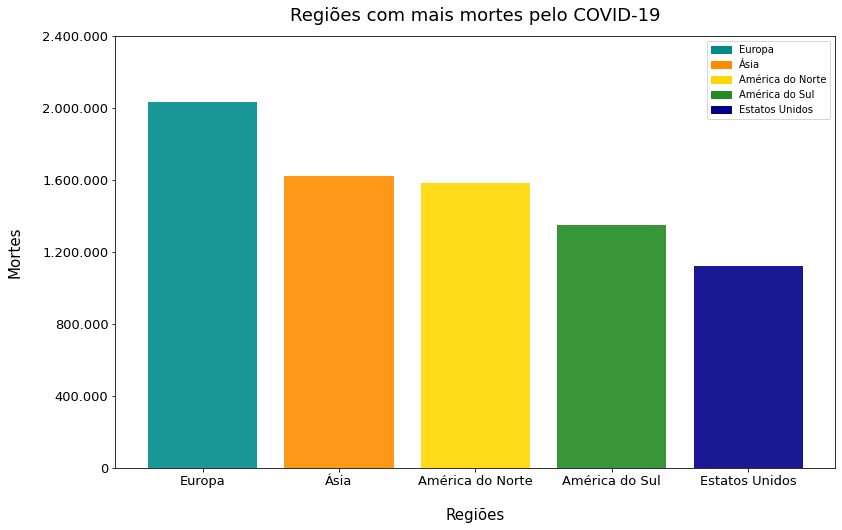

In [234]:
#Plotar o gráfico
cores = {'Europa': '#008B8B',
         'Ásia': 'darkorange',
         'América do Norte': '#FFD700',
         'América do Sul': '#228B22',
         'Estatos Unidos':'#00008B'}

labels = list(cores.keys())
y = paises5mortes['total_deaths']

fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([1,1,1,1])

ax.bar(labels, y, color=cores.values(), alpha=0.9)
ax.set_title('Regiões com mais mortes pelo COVID-19', fontsize=18, pad=15)
ax.set_xlabel('Regiões', fontsize=15, labelpad=20)
ax.set_ylabel('Mortes', fontsize=15, labelpad=20)

ax.set_yticks([0, 400000, 800000, 1200000, 1600000, 2000000, 2400000])
ax.set_yticklabels(['0', '400.000', '800.000', '1.200.000', '1.600.000', '2.000.000', '2.400.000'], fontsize=13)
ax.set_xticklabels(labels,fontsize=13)

handles = [plt.Rectangle((0,0),1,1, color=cores[label]) for label in labels]
ax.legend(handles, labels)
plt.show()



Observando o gráfico acima, podemos ver as 5 regiões com mais mortes pelo COVID-19, sendo 4 Continentes e 1 País.

E uma coisa muito curiosa é que a América do Norte só tem 3 países(México, Canadá e Estados Unidos), e os Estados Unidos está quase alcançando a América do Norte em mortes.

Então vamos descobrir qual é a porcentagem de mortes que os Estados Unidos possuí em relação à America do Norte.

In [235]:
#Descobrindo quantas mortes tem em cada um
c1 = df['location'] == 'North America'
c2 = df['location'] == 'United States'
c3 = df['date'] == '2023-02-27'

america_norte = df_new.loc[c1 & c3, 'total_deaths']
estados_unidos = df_new.loc[c2 & c3, 'total_deaths']

In [236]:
america_norte

170419    1583217.0
Name: total_deaths, dtype: float64

In [237]:
estados_unidos

246042    1119550.0
Name: total_deaths, dtype: float64

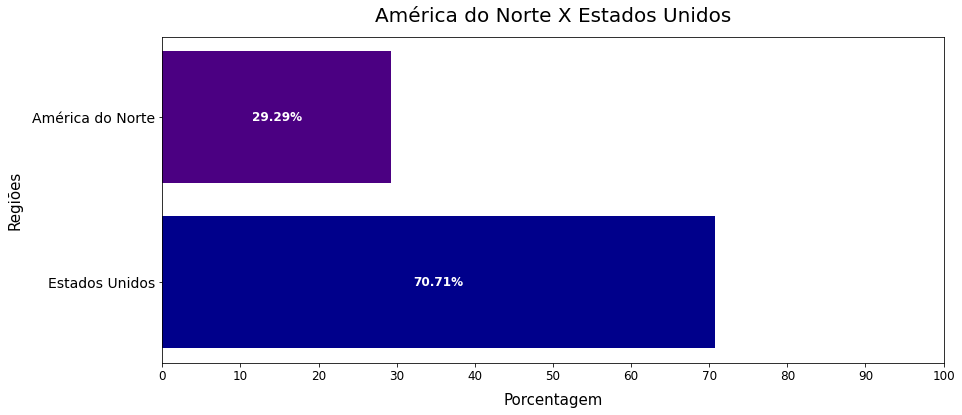

In [238]:
#Descobrindo o percentual
an = 1583217
eu = 1119550
dif1 = an - eu

percent_us_an = (eu/an)*100
percent_an_us = (dif1/an)*100

#Rótulos
regiao = ['Estados Unidos', 'América do Norte']
participacao = [percent_us_an, percent_an_us]
cores = ['#00008B', '#4B0082']
labels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valores = [70.71, 29.29]

#Criando o gráfico
fig, ax = plt.subplots(figsize=(14,6))
ax.barh(regiao, participacao, 
         align='center', 
         color=cores)

#plt.yticks(posicoes, barras)
plt.title('América do Norte X Estados Unidos', fontsize=20, pad=15)
plt.xlabel('Porcentagem', fontsize=15, labelpad=10)
plt.ylabel('Regiões', fontsize=15, labelpad=10)

ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(labels,fontsize=12)
ax.set_yticklabels(regiao,fontsize=14)

#Função para adicionar texto no gráfico
max_valor = max(valores)
min_valor = min(valores)

plt.text(x=14.64, y=1, s="29.29%", color='white', fontweight='bold', 
         ha='center', va='center', fontsize=12)
plt.text(x=35.35, y=0, s="70.71%", color='white', fontweight='bold', 
         ha='center', va='center', fontsize=12)

plt.show()

Como podemos ver, os Estados Unidos representa pouco mais de 70% de todas as mortes do América do Norte, restando pouco menos de 30% das mortes para dividir entre o México e o Canadá.

Text(0.5, 1.0, 'Evolução de casos COVID-19')

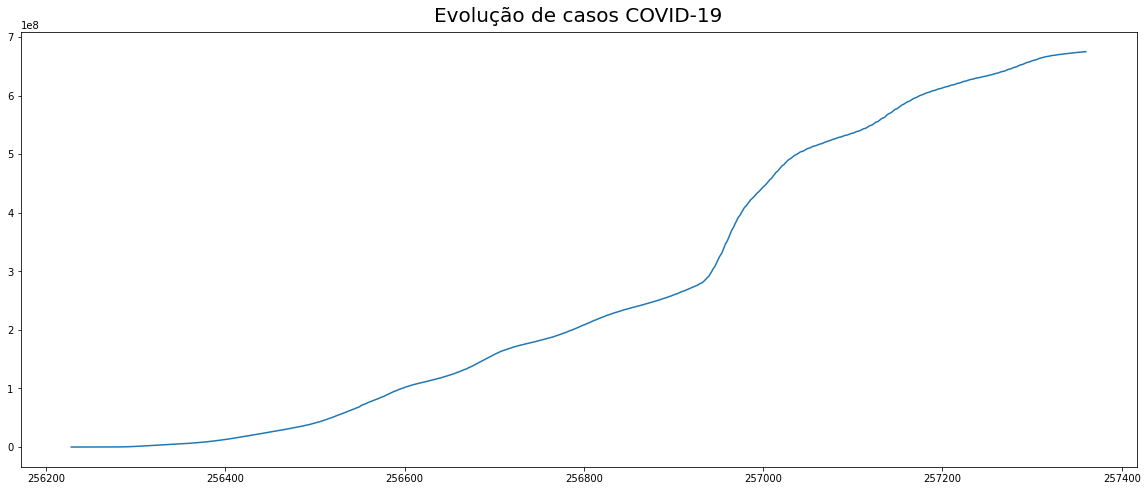

In [239]:
#Gráfico para ver a evolução do total de casos de COVID-19 no mundo
corona_tempo = df.loc[df['location'] == 'World', ['total_cases', 'date']]
corona_tempo.set_index('date')

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(corona_tempo.index, corona_tempo['total_cases'])
ax.set_title('Evolução de casos COVID-19', fontsize=20, pad=10)

Olhando o gráfico acima, podemos perceber que os casos de COVID-19 começaram a crescer de forma bem acelerada, porém depois de um certo tempo, ou melhor...no ápice da pandemia, a quantidade dos casos confirmados cresceram de forma exponencial.

## Como está a vacinação mundial ? 

Em nosso Dataset, também temos disponíveis os dados relacionados à vacinação, e é claro que iremos utilizar eles. Mas antes de começar a fazer qualquer representação gráfica, teremos que fazer um pequeno cálculo, vejamos:

<img src="https://www.ubatuba.sp.gov.br/wp-content/uploads/sites/2/2021/01/0118-vacinacao-covid19.jpeg" width=90%>

Séra nescessário selecionarmos a coluna `location` e ver onde a entrada é "World" na data mais atual, que é onde se encontra os dados gerais mais recentes.  

In [240]:
mundo = df.loc[df['location'] == 'World']
vacinados = mundo.loc[df['date'] == "2023-02-27"]

vacinados['people_vaccinated']

257360    5.555331e+09
Name: people_vaccinated, dtype: float64

E o cálculo será feito da seguinte forma, se observarmos...o resultado que nos foi apresentado de quantas pessoas já foram vacinadas é igual a: 5.555331e+09. E isso quer dizer que 5.55 bilhões de pessoas já foram vacinadas, e hoje dia 27 de Fevereiro de 2023 existem 8.06 bilhões de pessoas no mundo, então para calcular essa diferença em porcentagem basta dividir a quantidade de pessoas no mundo, pela quantidade de pessoas que foram vacinadas e também vou realizar a diferença de uma pela outra, 8.06 - 5.55

In [241]:
pessoas_atual = 8.06
pessoas_vacinadas = 5.55

dif = pessoas_atual - pessoas_vacinadas

porc_vacinados = (pessoas_vacinadas/pessoas_atual)*100
porc_nao_vacinados = (dif/pessoas_atual)*100

print(f"Pessoas vacinadas: {porc_vacinados:.2f}%")
print(f"Pessoas não vacinadas: {porc_nao_vacinados:.2f}%")

Pessoas vacinadas: 68.86%
Pessoas não vacinadas: 31.14%


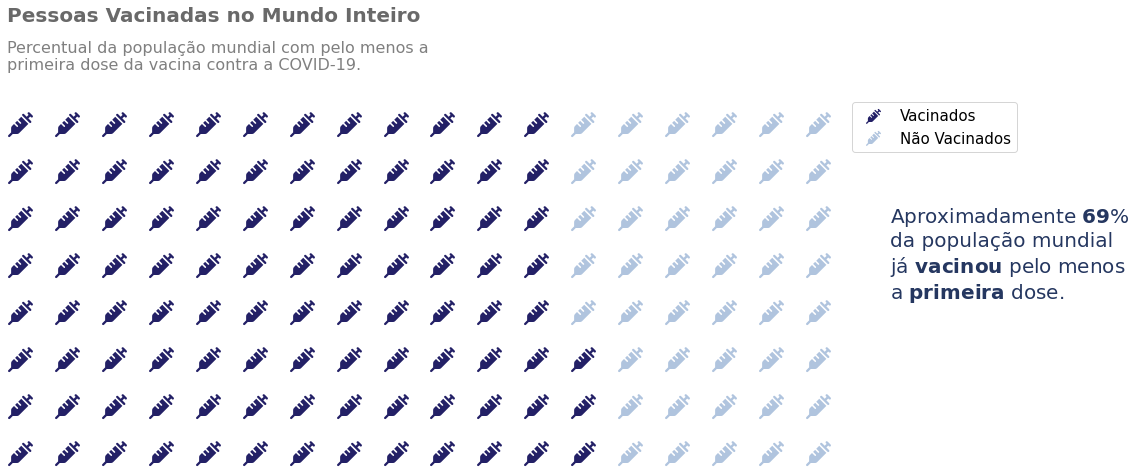

In [242]:
#Pessoas vacinadas do COVID-19 
fig = plt.figure(
    FigureClass=Waffle,
    figsize=(15,8),
    rows=8,
    columns=18,
    colors=("#232066", "#B0C4DE"),
    values=[porc_vacinados, porc_nao_vacinados], icons='syringe', icon_size=25,
    icon_legend=True,
    legend={
        'labels': ['Vacinados', 'Não Vacinados'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1),
        'fontsize': 15
    }
)

plt.text(0, 1.2, 'Pessoas Vacinadas no Mundo Inteiro',
         fontsize=20, 
         color="#696969",
         weight='bold')

plt.text(0, 1.15,
         "Percentual da população mundial com pelo menos a\n"
         "primeira dose da vacina contra a COVID-19.",
         verticalalignment="top",
         fontsize=16,
         color="#808080")

plt.text(2.4, 0.7,
         "Aproximadamente "
         "$\\bf{69}$%\n"
         "da população mundial\n"
         "já $\\bf{vacinou}$ pelo menos\n"
         "a $\\bf{primeira}$ dose."
         ,
         verticalalignment="top",
         fontsize=20,
         color="#253760")

fig.set_tight_layout(False)
plt.show();

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais

## Análise Exploratório para o Brasil

É claro que com todos esses dados ao nosso dispor, não poderia deixar de fazer uma pequena análise aqui para o Brasil

<img src="https://raw.githubusercontent.com/ferreiramar96/Analise-de-Dados-Covid-19/main/covid-brasil.jpg" width=95%>

E nessa pequena análise, vou realizar os seguintes tópicos:
* Criar uma cópia do DataFrame apenas com o Brasil
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais
* Plotar um gráfico Waffle para a porcentagem de brasileiros vacinados

In [245]:
#Criando um DataFrame com os dados apenas do Brasil
df_brasil = df.loc[df['location'] == 'Brazil'].copy()
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31715,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31716,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31717,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
31718,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,2427.8,1.14,3.12,11.387628
31719,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [246]:
df_brasil['date'].max()

Timestamp('2023-02-27 00:00:00')

Acabamos de verificar que nosso Dataset inclui as datas desde <strong>26-02-2020</strong> até <strong>27-02-2023</strong>.

Agora vamos descobrir quando foi identificado o primeiro caso e a primeira morte no Brasil.

Mas antes, vamos ter que excluir os valores nulos das colunas `new_cases` e `new_deaths`, pois haverá complicações se não apagar esses dados.

In [256]:
#Limpando os dados
df_brasil.dropna(subset=['new_cases', 'new_deaths'], inplace=True)

In [257]:
#Quando foi registrado a primeira morte
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31735,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [260]:
#Quando foi registrado o primeiro caso
df_brasil.loc[df_new['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
31735,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [265]:
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[31735]))
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[31735]))

O primeiro caso foi registrado em 2020-03-17 00:00:00
A primeira morte foi registrada em 2020-03-17 00:00:00


Vemos que o primeiro caso e a primeira morte foram registrados no mesmo dia, então a diferença de dias é igual a 0

E para finalizar vou plotar gráficos de linha para compararmos a evolução dos casos e mortes aqui Brasil.

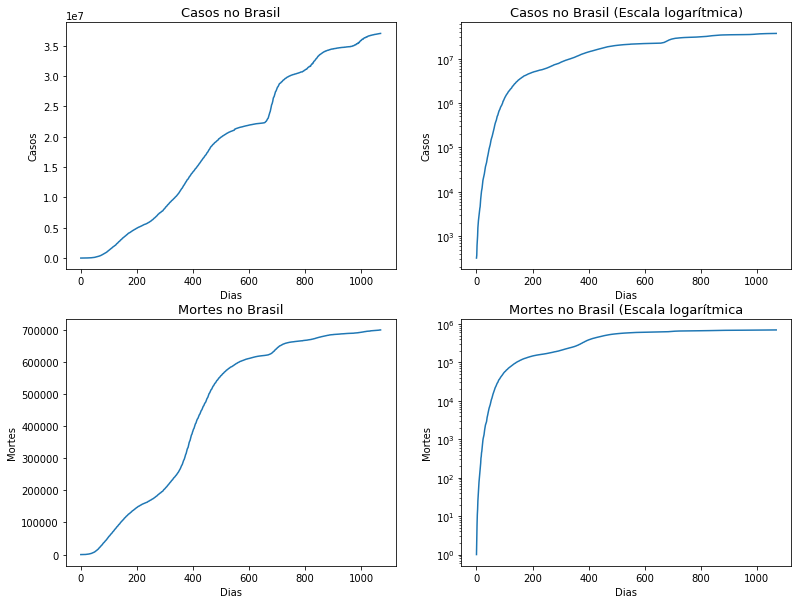

In [273]:
#Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(1071))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
ax1.set_title('Casos no Brasil', fontsize=13)
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)', fontsize=13)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil', fontsize=13)
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica', fontsize=13)
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)

plt.show()

## <strong> Conclusões </strong>

Podemos concluir que a análise de dados é de muita importância no estudo dos dados do COVID-19 no Brasil e no mundo, pois com ela foi possível ter um panorama global e verificar o desempenho do país no combate a este vírus que tirou a vida de milhões de pessoas ao redor do mundo e mais de 690 mil no Brasil. Além disso, foi possível comparar o Brasil em relação a outros países.

Foi possível analisar também a eficácia da vacinação que avançou no país, pois a média de mortos e de infectados caiu, ao passo que o número de vacinados aumentou, mas vale ressaltar que, por mais que tenha apresentado eficácia, a média móvel de vacinados caiu muito e ainda não chegamos em nem 70% do mundo vacinado, faltando pouco, o que é preocupante, pois infelizmente muitas pessoas não vacinam simplesmente por que não querem, e com isso eles acabam contaminando muitas outras pessoas que se cuidam.

Mesmo após 3 anos, o covid ainda acaba sendo letal para algumas pessoas, então continuem se protejendo!